In [1]:
%load_ext autoreload
%autoreload 2
import torch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pickle

In [2]:

from mlstm_kernels.utils.benchmark.plot_results import plot_runtime_results, plot_runtime_results_fwbw
from plot_config import (
    col_order_fwbw,
    col_order_fw,
    legend_order,
    style_dict, 
)

In [3]:
DATA_PATH = Path("../../outputs_kernel_benchmarks")
DATA_FILE_CONSTTOK_HD512 = DATA_PATH / "2024-12-07_09-33-26__consttoken_pt251/constant_tokens_sequence_fw/results.csv"
DATA_FILE_CONSTTOK_HD512_FW = DATA_PATH / "2024-12-07_09-33-26__consttoken_pt251/constant_tokens_sequence_fw/results.csv"

# consttok_res_hd512_df = pd.read_csv(DATA_FILE_CONSTTOK_HD512)
# consttok_res_hd512_fw_df = pd.read_csv(DATA_FILE_CONSTTOK_HD512_FW)


In [3]:


# plot_data = {"consttok_res_hd512_df": consttok_res_hd512_df, "consttok_res_hd512_fw_df": consttok_res_hd512_fw_df}

# with open("consttoken_results.pkl", "wb") as fp:
#     pickle.dump(plot_data, fp)

with open("consttoken_results.pkl", "rb") as fp:
    plot_data = pickle.load(fp)

consttok_res_hd512_df = plot_data['consttok_res_hd512_df']
consttok_res_hd512_fw_df = plot_data['consttok_res_hd512_fw_df']

consttok_res_hd512_df = consttok_res_hd512_df.filter(regex=r"P--sequence_length|R--.*").rename(columns=lambda x: x[3:])
consttok_res_hd512_fw_df = consttok_res_hd512_fw_df.filter(regex=r"P--sequence_length|R--.*").rename(columns=lambda x: x[3:])



In [4]:
consttok_res_hd512_df

,parallel--triton_limit_headdim__bfloat16__fwbw__nh-8_hdv-512_hdq-512,chunkwise--triton_limit_chunk__bfloat16__fwbw__cs-64_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-128_nh-8_hdv-512_hdq-256,chunkwise--native_custbw____bfloat16__fwbw__cs-128_nh-8_hdv-512_hdq-256,chunkwise--native_custbw____bfloat16__fwbw__cs-256_nh-8_hdv-512_hdq-256,chunkwise--native_custbw____bfloat16__fwbw__cs-64_nh-8_hdv-512_hdq-256,chunkwise--native_autograd____bfloat16__fwbw__cs-256_nh-8_hdv-512_hdq-256,chunk_gla____bfloat16__fwbw__nh-8_hdv-512_hdq-256,fused_chunk_gla__bfloat16__fwbw__nh-8_hdv-512_hdq-256,chunk_simple_gla__bfloat16__fwbw__nh-8_hdv-512_hdq-256,mamba____bfloat16__fwbw__nh-1_hdv-8192_hdq-16,mamba2____bfloat16__fwbw__nh-128_hdv-64_hdq-64,mamba2_noconv____bfloat16__fwbw__nh-128_hdv-64_hdq-64,flashattn3____bfloat16__fwbw__nh-32_hdv-128_hdq-128,sequence_length,torch_flash__bfloat16__fwbw__nh-32_hdq-128_hdv-128,torch_cudnn__bfloat16__fwbw__nh-32_hdq-128_hdv-128
0,NaN,29.604472,21.439533,48.635877,42.931391,71.885770,52.169381,31.778146,34.673772,17.513850,54.094856,43.611512,207.571850,13.960305,512,16.895203,13.062157
1,NaN,29.793893,21.666431,49.794631,44.051376,72.856371,61.540407,33.144479,34.404323,17.119746,56.703424,43.154161,208.701914,13.411883,1024,20.256198,14.920640
2,NaN,29.236046,21.953376,49.610695,43.272790,76.215300,79.449334,33.860676,34.934948,17.458374,61.013892,42.470007,201.978899,15.262400,2048,29.091712,19.404836
3,NaN,29.704386,21.366069,53.106152,43.949281,82.693092,114.879916,34.289813,35.088854,17.954916,60.385326,42.817782,209.033382,20.489313,4096,50.805618,31.744356
4,NaN,30.079974,21.609419,59.354269,46.527633,102.693796,187.046111,33.809131,35.025208,17.918113,62.181607,42.984215,208.202868,32.882070,8192,97.715537,57.225568
5,NaN,30.469042,21.702173,98.827232,63.893235,170.383766,326.944348,33.755396,35.971299,18.810279,63.169013,42.198906,207.932356,58.838712,16384,192.819852,113.699826
6,NaN,32.329100,21.879741,153.674085,89.850032,287.961802,602.958391,34.482912,36.484902,18.601366,64.018530,42.988217,218.759279,114.346098,32768,380.603193,223.489155
7,NaN,32.180242,21.657409,303.001275,156.260080,568.519488,1179.388635,36.481475,43.106932,19.809883,67.034137,43.221594,208.558811,227.114422,65536,752.714773,451.606150


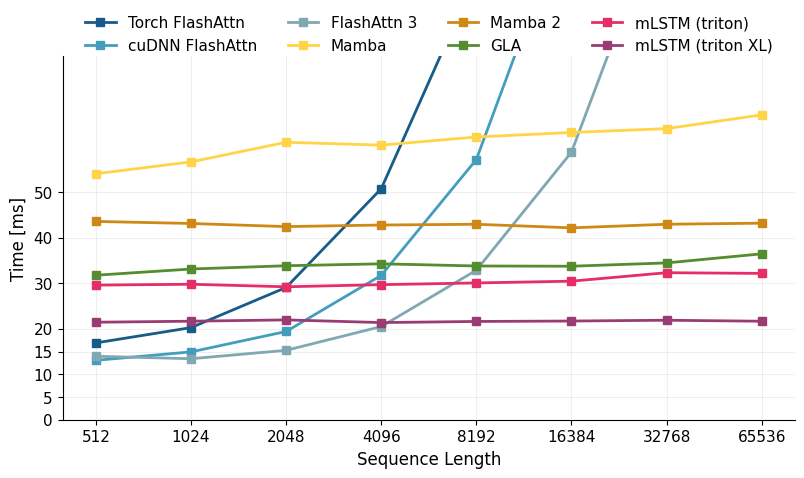

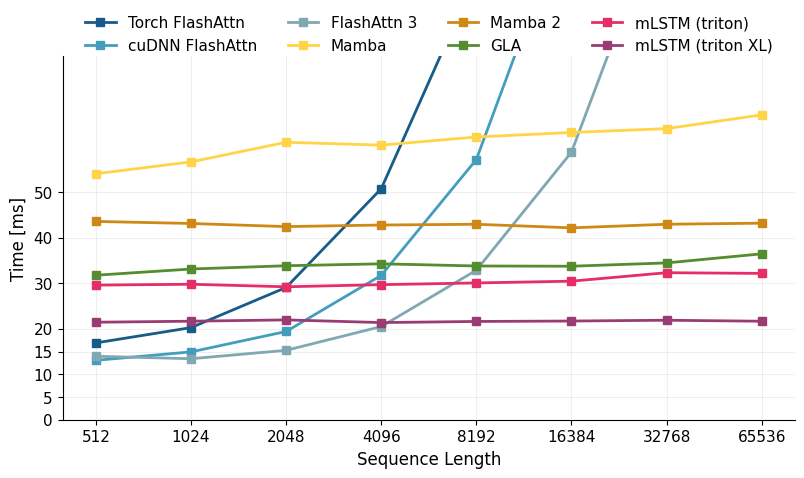

In [5]:
f = plot_runtime_results(
    # left
    data_df=consttok_res_hd512_df,
    yticks=[0, 5, 10, 15, 20, 30, 40, 50],
    # right
    plot_column_order=col_order_fwbw,
    # df_right=sequence_length_res_hd512_df,
    # yticks_right=[0, 5, 10, 20, 30, 40],
    filename="sequence_length_consttok_nh8_hd512_fwbw_line",
    group_cols=["sequence_length"],
    plot_type="line",
    style_dict=style_dict,
    ylim=(0, 80),
    # modify_df_func=modify_df,
    figsize=(2 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54),
    add_colname=False,
)
f

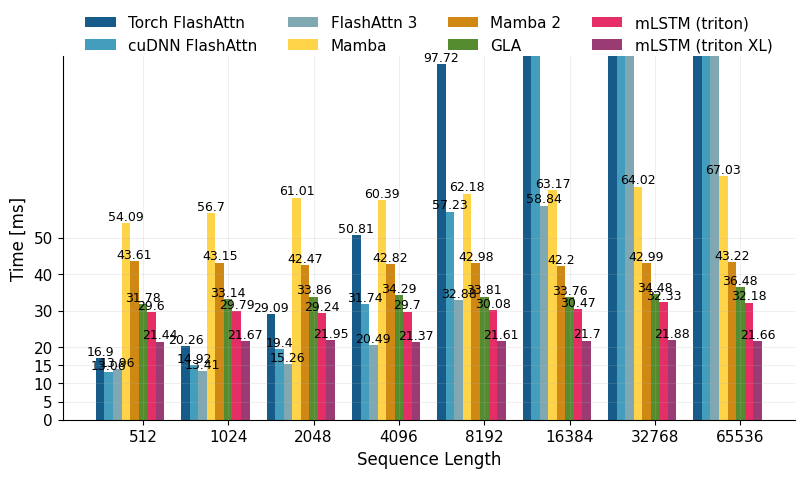

In [6]:
f = plot_runtime_results(
    # left
    data_df=consttok_res_hd512_df,
    yticks=[0, 5, 10, 15, 20, 30, 40, 50],
    # right
    plot_column_order=col_order_fwbw,
    # df_right=sequence_length_res_hd512_df,
    # yticks_right=[0, 5, 10, 20, 30, 40],
    filename="sequence_length_consttok_nh8_hd512_fwbw_bar",
    group_cols=["sequence_length"],
    plot_type="bar",
    style_dict=style_dict,
    ylim=(0, 100),
    # modify_df_func=modify_df,
    figsize=(2 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54),
    add_colname=False,
)
f

# FWBW

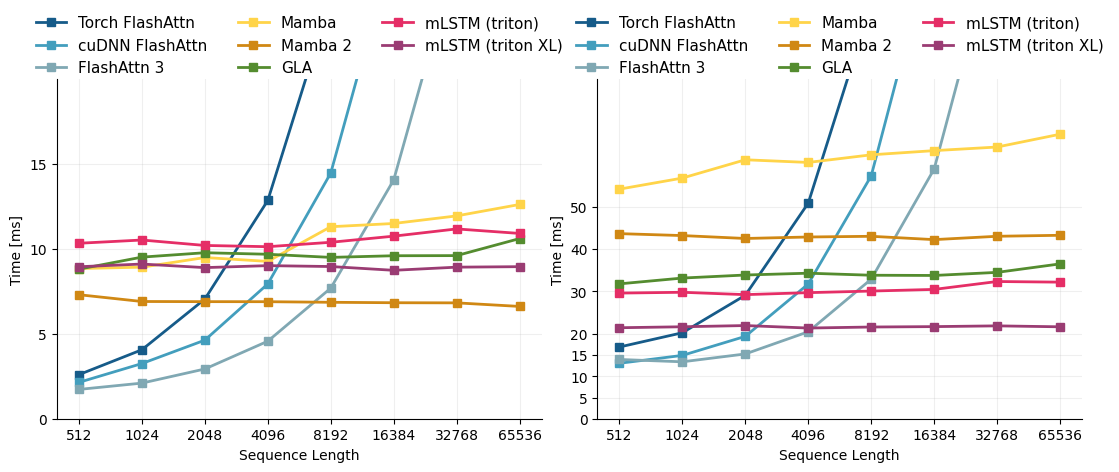

In [7]:
f = plot_runtime_results_fwbw(
    df_left=consttok_res_hd512_fw_df,
    df_right=consttok_res_hd512_df,
    yticks_left=[0, 5, 10, 15],
    yticks_right=[0, 5, 10, 15, 20, 30, 40, 50],
    col_order_left=col_order_fw,
    col_order_right=col_order_fwbw,
    # df_right=sequence_length_res_hd512_df,
    # yticks_right=[0, 5, 10, 20, 30, 40],
    filename_wo_ending="sequence_length_consttok_nh8_hd512_line",
    group_cols=["sequence_length"],
    plot_type="line",
    style_dict=style_dict,
    ylim_left=(0, 20),
    ylim_right=(0, 80),
    # modify_df_func=modify_df,
    add_colname=False,
)
f

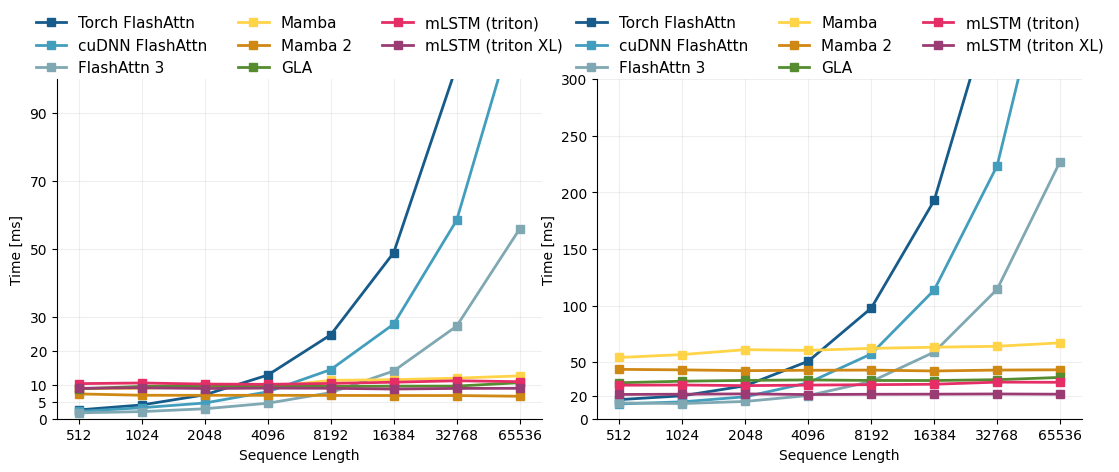

In [8]:
f = plot_runtime_results_fwbw(
    df_left=consttok_res_hd512_fw_df,
    df_right=consttok_res_hd512_df,
    yticks_left=[0, 5, 10, 20, 30, 50, 70, 90],
    yticks_right=[0, 20, 50, 100, 150, 200, 250, 300],
    col_order_left=col_order_fw,
    col_order_right=col_order_fwbw,
    # df_right=sequence_length_res_hd512_df,
    # yticks_right=[0, 5, 10, 20, 30, 40],
    filename_wo_ending="sequence_length_consttok_nh8_hd512_line_zoomout",
    group_cols=["sequence_length"],
    plot_type="line",
    style_dict=style_dict,
    ylim_left=(0, 100),
    ylim_right=(0, 300),
    # modify_df_func=modify_df,
    add_colname=False,
)
f

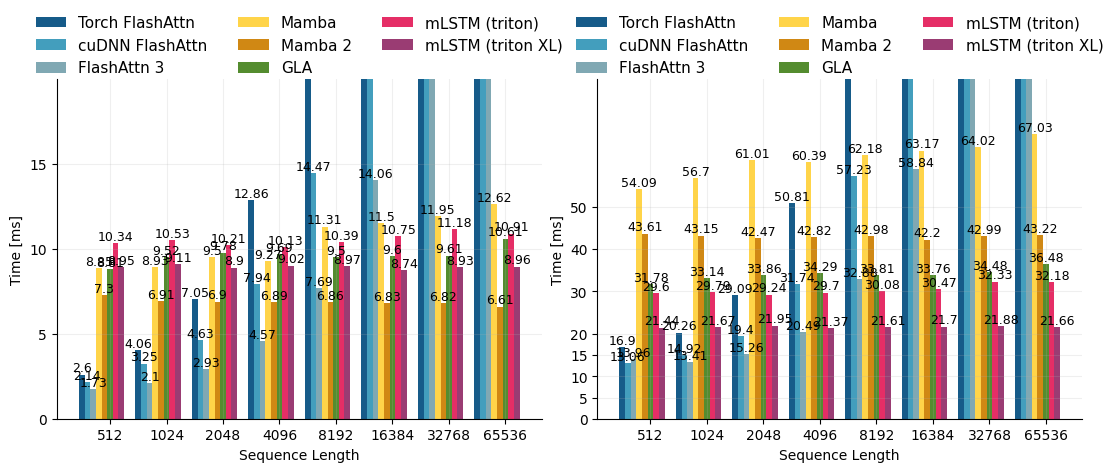

In [9]:
f = plot_runtime_results_fwbw(
    df_left=consttok_res_hd512_fw_df,
    df_right=consttok_res_hd512_df,
    yticks_left=[0, 5, 10, 15],
    yticks_right=[0, 5, 10, 15, 20, 30, 40, 50],
    col_order_left=col_order_fw,
    col_order_right=col_order_fwbw,
    style_dict=style_dict,
    # df_right=sequence_length_res_hd512_df,
    # yticks_right=[0, 5, 10, 20, 30, 40],
    filename_wo_ending="sequence_length_consttok_nh8_hd512_bar",
    group_cols=["sequence_length"],
    plot_type="bar",
    ylim_left=(0, 20),
    ylim_right=(0, 80),
    # modify_df_func=modify_df,
    add_colname=False,
)
f